# **Data understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Étape 1 : Charger le dataset pour démarrer le processus complet de sélection des caractéristiques

import pandas as pd

# Charger le dataset nettoyé et enrichi
df = pd.read_excel("dataset_prediction_service_final.xlsx")

# Aperçu des premières lignes
df.head()


,Customer_ID,Age,Gender,Region,Marital_Status,Occupation,Income Level,Tenure_Years,Satisfaction_Score,Interested_in_Other_Products,Marketing_Interaction,Preferred Communication Channel,Purchase_Amount,Purchase_Date,Next_Purchase_Probability,Current_Product,Viewed_Services,Bookmarked_Service,Is_Bookmarked,Second_Purchase_Service
0,CUST00001,56,Male,Gabes,Married,Salesperson,57797,4,2,Yes,NaN,In-Person Meeting,7788,2022-07-01,0.38,Auto,"Real Estate, Auto",Real Estate,1,Real Estate
1,CUST00002,69,Male,Bizerte,Single,Manager,120706,8,3,No,Email,Email,3161,2023-05-20,0.05,Real Estate,Auto,Auto,1,Auto
2,CUST00003,46,Female,Bizerte,Married,Nurse,31576,4,3,No,NaN,In-Person Meeting,9576,2023-08-30,0.76,Health,Real Estate,Real Estate,1,Real Estate
3,CUST00004,32,Female,Sfax,Single,Nurse,96528,5,2,No,Email,Text,8687,2023-08-21,0.95,Health,"Auto, Real Estate, Health",Auto,1,Auto
4,CUST00005,60,Male,Tunis,Single,Doctor,129753,18,5,Yes,Email,In-Person Meeting,3863,2023-01-24,0.18,Auto,"Auto, Health",Auto,1,Auto


In [3]:
df.shape

(5000, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_ID                      5000 non-null   object 
 1   Age                              5000 non-null   int64  
 2   Gender                           5000 non-null   object 
 3   Region                           5000 non-null   object 
 4   Marital_Status                   5000 non-null   object 
 5   Occupation                       5000 non-null   object 
 6   Income Level                     5000 non-null   int64  
 7   Tenure_Years                     5000 non-null   int64  
 8   Satisfaction_Score               5000 non-null   int64  
 9   Interested_in_Other_Products     5000 non-null   object 
 10  Marketing_Interaction            3723 non-null   object 
 11  Preferred Communication Channel  5000 non-null   object 
 12  Purchase_Amount     

In [5]:
df.describe()

,Age,Income Level,Tenure_Years,Satisfaction_Score,Purchase_Amount,Next_Purchase_Probability,Is_Bookmarked
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,46.148600,82572.573400,9.560000,3.035400,4977.515000,0.500860,0.700000
std,16.325753,36170.704735,5.759569,1.403047,2852.373909,0.284546,0.458303
min,18.000000,20001.000000,0.000000,1.000000,100.000000,0.010000,0.000000
25%,32.000000,52009.000000,5.000000,2.000000,2478.500000,0.250000,0.000000
50%,46.000000,81044.500000,10.000000,3.000000,4975.000000,0.500000,1.000000
75%,60.000000,114875.250000,15.000000,4.000000,7496.250000,0.760000,1.000000
max,74.000000,149999.000000,19.000000,5.000000,9998.000000,0.990000,1.000000


In [6]:
df.columns.tolist()

['Customer_ID',
 'Age',
 'Gender',
 'Region',
 'Marital_Status',
 'Occupation',
 'Income Level',
 'Tenure_Years',
 'Satisfaction_Score',
 'Interested_in_Other_Products',
 'Marketing_Interaction',
 'Preferred Communication Channel',
 'Purchase_Amount',
 'Purchase_Date',
 'Next_Purchase_Probability',
 'Current_Product',
 'Viewed_Services',
 'Bookmarked_Service',
 'Is_Bookmarked',
 'Second_Purchase_Service']

In [7]:
df['Second_Purchase_Service'].describe()

,Second_Purchase_Service
count,5000
unique,3
top,Auto
freq,1678


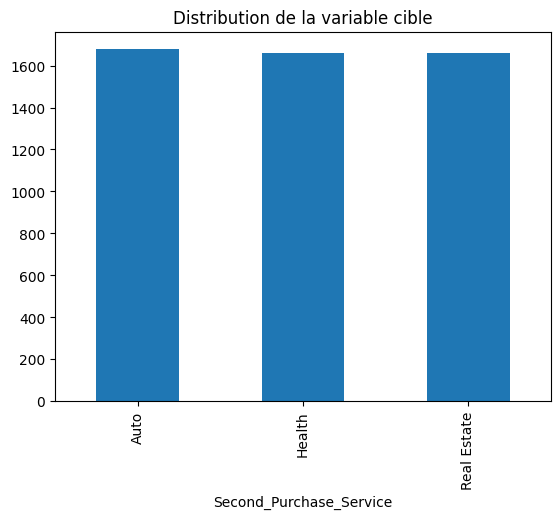

In [8]:
df['Second_Purchase_Service'].value_counts().plot(kind="bar", title="Distribution de la variable cible")
plt.show()

# **Préparation des données**

In [9]:
df.drop(columns=["Customer_ID", "Preferred Communication Channel", "Purchase_Date", "Next_Purchase_Probability"], inplace=True)
print(df)

      Age  Gender   Region Marital_Status   Occupation  Income Level  \
0      56    Male    Gabes        Married  Salesperson         57797   
1      69    Male  Bizerte         Single      Manager        120706   
2      46  Female  Bizerte        Married        Nurse         31576   
3      32  Female     Sfax         Single        Nurse         96528   
4      60    Male    Tunis         Single       Doctor        129753   
...   ...     ...      ...            ...          ...           ...   
4995   67  Female    Tunis        Married  Salesperson        102793   
4996   39  Female    Gabes       Divorced      Manager         30594   
4997   46  Female  Bizerte         Single      Manager        120921   
4998   39  Female    Gabes        Married  Salesperson         43698   
4999   61    Male  Bizerte         Single      Manager         54010   

      Tenure_Years  Satisfaction_Score Interested_in_Other_Products  \
0                4                   2                          

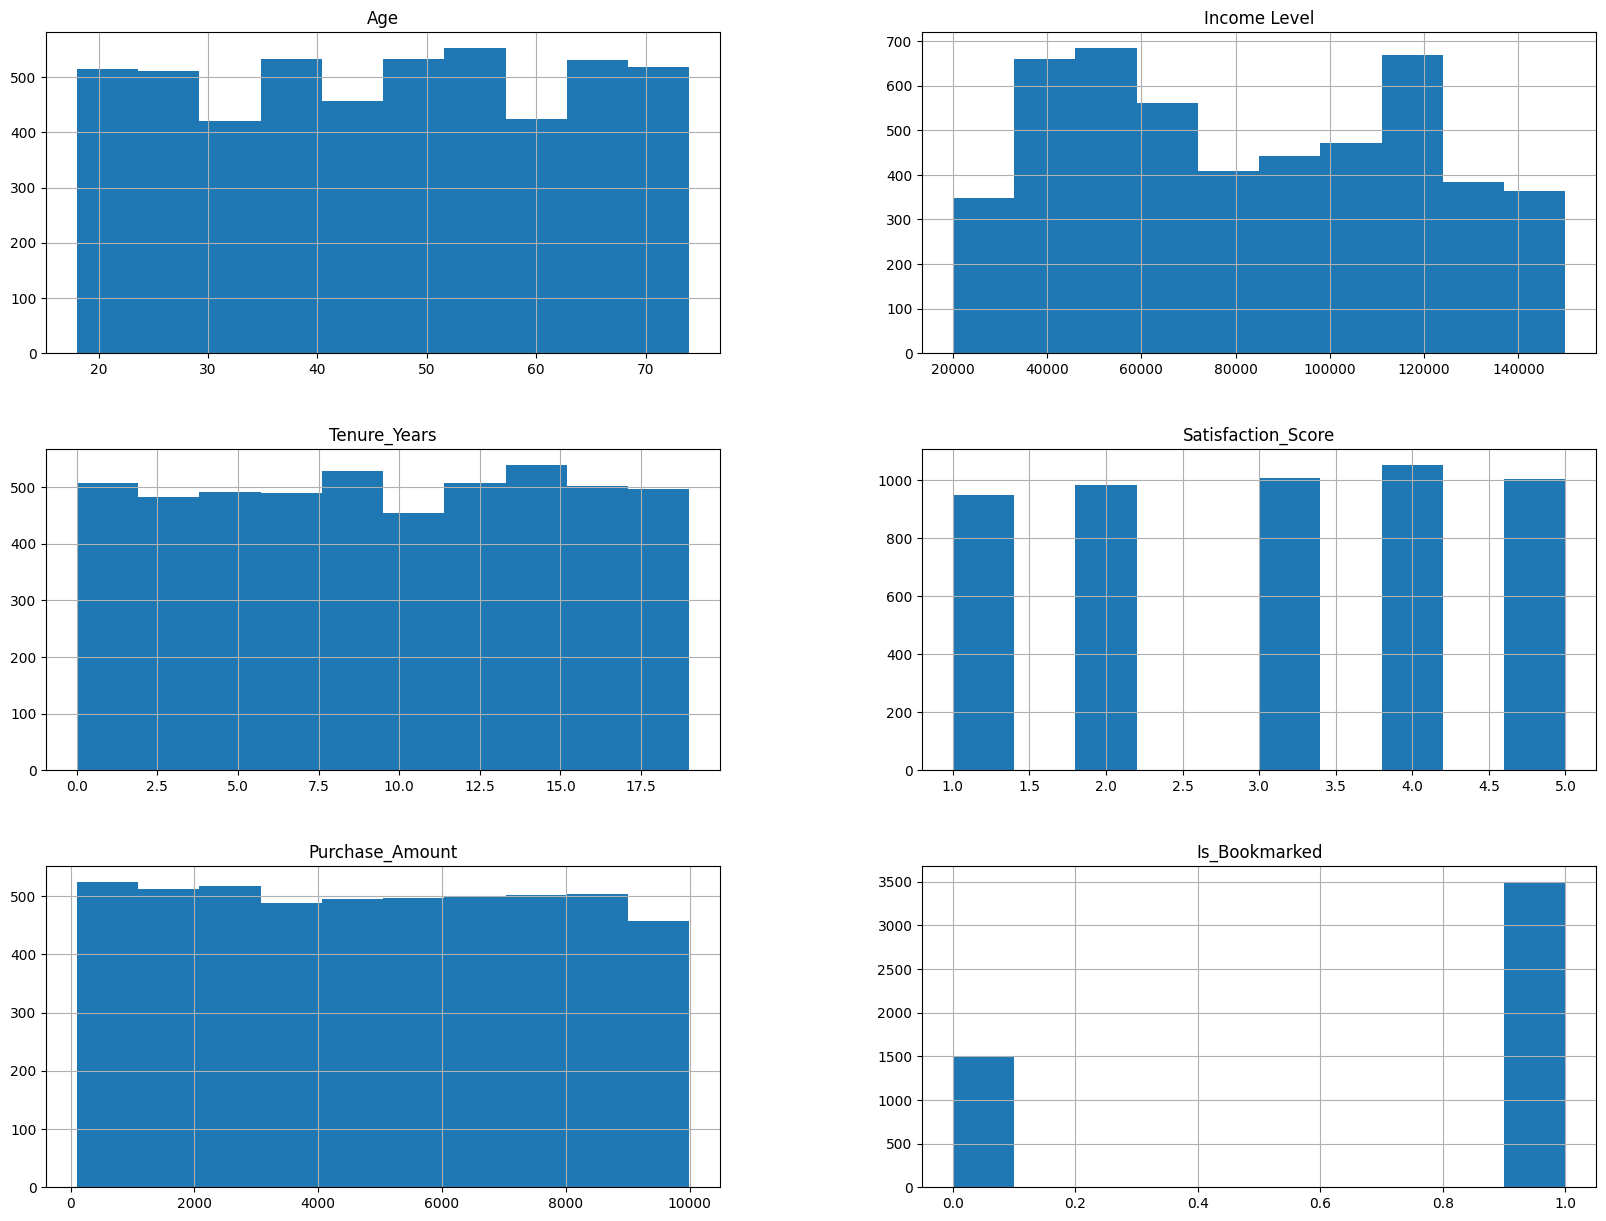

In [10]:
df.hist(figsize=(20,15))
plt.show()

In [11]:
df.isnull().sum()

,0
Age,0
Gender,0
Region,0
Marital_Status,0
Occupation,0
Income Level,0
Tenure_Years,0
Satisfaction_Score,0
Interested_in_Other_Products,0
Marketing_Interaction,1277


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Traitement des valeurs manquantes
df["Marketing_Interaction"].fillna("Unknown", inplace=True)
df["Bookmarked_Service"].fillna("None", inplace=True)
df["Is_Bookmarked"] = (df["Bookmarked_Service"] != "None").astype(int)


In [14]:
# Feature Engineering : transformation de Viewed_Services
df['Is_Health_Viewed'] = df['Viewed_Services'].str.contains("Health").astype(int)
df['Is_Auto_Viewed'] = df['Viewed_Services'].str.contains("Auto").astype(int)
df['Is_RealEstate_Viewed'] = df['Viewed_Services'].str.contains("Real Estate").astype(int)
df.drop(columns=['Viewed_Services'], inplace=True)


<Axes: >

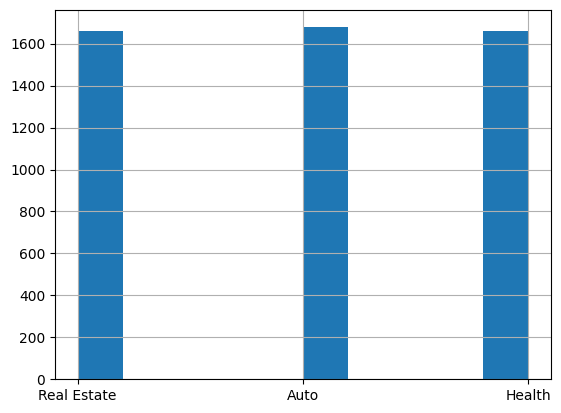

In [15]:
df['Second_Purchase_Service'].hist()

In [16]:
# Encodage de la cible
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['Second_Purchase_Service'])

# **Feature selection**



In [ ]:
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd


# # Nettoyage des colonnes
# df_model = df.drop(columns=[
#     'Customer_ID',
#     'Preferred Communication Channel',
#     'Purchase_Date',
#     'Next_Purchase_Probability'
# ]).copy()

# # Encodage de la variable cible
# le_target = LabelEncoder()
# df_model['target_encoded'] = le_target.fit_transform(df_model['Second_Purchase_Service'])

# # Préparation X / y
# X_raw = df_model.drop(columns=['Second_Purchase_Service', 'target_encoded'])
# y = df_model['target_encoded']

# # Encodage des variables catégorielles
# X_encoded = pd.get_dummies(X_raw, drop_first=True)

# # Entraînement du modèle
# model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# model.fit(X_encoded, y)

# # Importances des features
# feature_importances = pd.DataFrame({
#     'Feature': X_encoded.columns,
#     'Importance': model.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# feature_importances.head(15)


In [17]:
X = df.drop(columns=['Second_Purchase_Service', 'target_encoded'])
y = df['target_encoded']

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)

# Chi2
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_encoded, y)
feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi2 Score': selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

feature_scores.head(10)

,Feature,Chi2 Score
1,Income Level,7805.451298
32,Bookmarked_Service_Real Estate,2378.240964
30,Bookmarked_Service_Health,2349.855596
4,Purchase_Amount,913.312063
6,Is_Health_Viewed,428.080500
7,Is_Auto_Viewed,422.666654
8,Is_RealEstate_Viewed,411.151482
0,Age,4.959917
21,Occupation_Nurse,4.786561
18,Occupation_Entrepreneur,3.376541


# **Séparation des données & normalisation (pour KNN/SVM)**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
#shape of our data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4000, 33) (4000,)
Test set: (1000, 33) (1000,)


# Modélisation avec **KNN**

In [21]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


# **Modélisation avec SVM**

In [22]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)



# **Modélisation et évaluation AdaBoost**

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialiser et entraîner l'arbre de décision
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree.predict(X_test)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost (pas besoin de normalisation pour ce modele)
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)




✨ Résultats du KNN
Accuracy: 0.832
F1-score: 0.8328795242984005
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       331
           1       0.87      0.81      0.84       333
           2       0.89      0.81      0.85       336

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



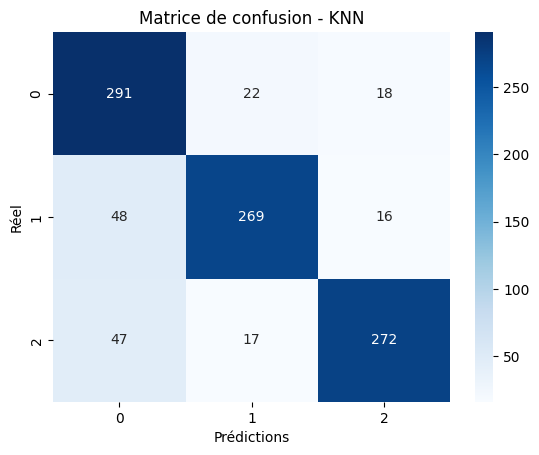


✨ Résultats du SVM
Accuracy: 0.884
F1-score: 0.8840732486326863
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       331
           1       0.90      0.88      0.89       333
           2       0.90      0.87      0.88       336

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



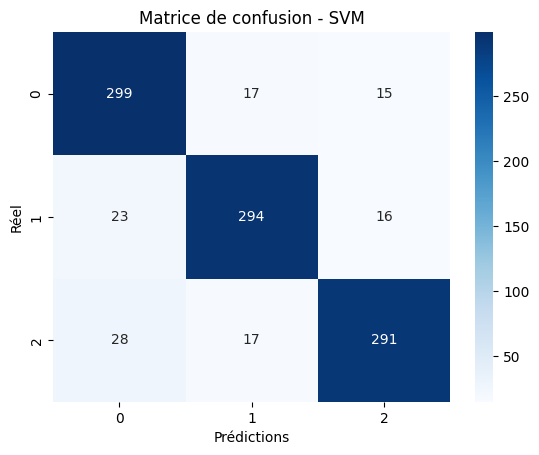


✨ Résultats du AdaBoost
Accuracy: 0.901
F1-score: 0.9022077316911513
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       331
           1       0.96      0.86      0.91       333
           2       1.00      0.84      0.91       336

    accuracy                           0.90      1000
   macro avg       0.92      0.90      0.90      1000
weighted avg       0.92      0.90      0.90      1000



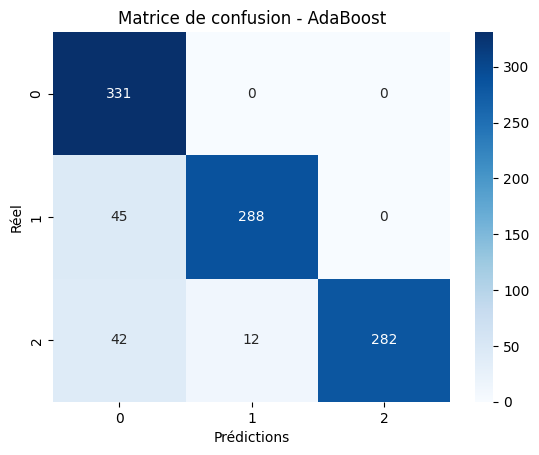


✨ Résultats du Decision Tree
Accuracy: 0.885
F1-score: 0.8847050432698527
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       331
           1       0.88      0.92      0.90       333
           2       0.90      0.90      0.90       336

    accuracy                           0.89      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.89      0.88      1000



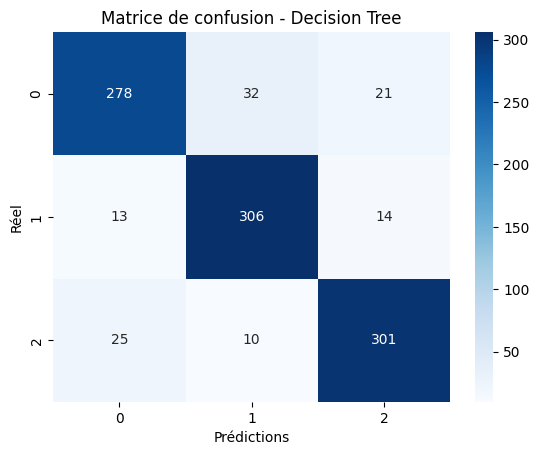

In [26]:
def eval_model(name, y_true, y_pred):
    print(f"\n\u2728 Résultats du {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.show()

# Évaluer les modèles
eval_model("KNN", y_test, y_pred_knn)
eval_model("SVM", y_test, y_pred_svm)
eval_model("AdaBoost", y_test, y_pred_ada)
eval_model("Decision Tree", y_test, y_pred_tree)

# **Benchmark**

In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Assuming y_test, y_pred_knn, y_pred_svm, y_pred_ada, and y_pred_tree are already defined
results = pd.DataFrame({
    'Modèle': ['KNN', 'SVM', 'AdaBoost', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_tree),
    ],
    'F1-score': [
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_ada, average='weighted'),
        f1_score(y_test, y_pred_tree, average='weighted'),
    ]
})

# Display the DataFrame
print(results)

          Modèle  Accuracy  F1-score
0            KNN     0.832  0.832880
1            SVM     0.884  0.884073
2       AdaBoost     0.901  0.902208
3  Decision Tree     0.885  0.884705


🎯 Le modèle AdaBoost est retenu pour la prédiction du prochain service à proposer au client.  
Il offre une précision de plus de 90% et gère efficacement la diversité des profils clients.  
Ce modèle sera utilisé dans une logique de recommandation personnalisée pour améliorer la fidélisation.
